In [5]:
from ops import Sigmoid, Dense, Graph, Trainer
from math_fns import mse, mse_grad

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from typing import Callable

## Define data

In [30]:
n = 1000
X = np.random.rand(n, 2)
Y = X[:, 0] ** 2 + X[:, 1] ** 2

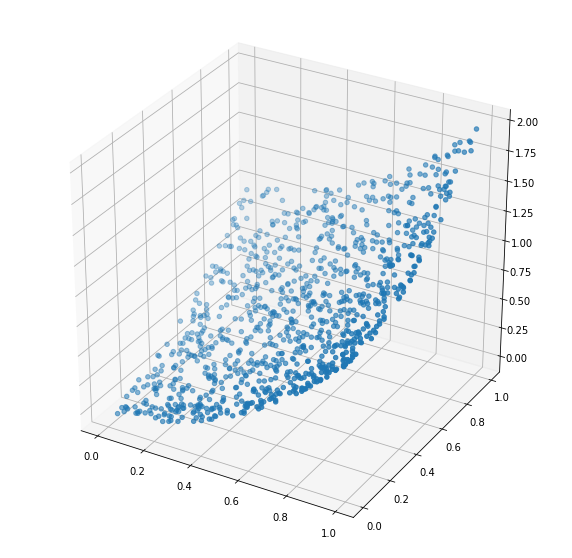

In [31]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], Y)

In [32]:
n_train = int(0.8 * X.shape[0])
X_train = X[:n_train, :]
X_test = X[n_train:, :]
Y_train = Y[:n_train]
Y_test = Y[n_train:]

# Train

In [33]:
g = Graph()
init_fn = lambda x, y: np.random.normal(size=(x,y), scale=2/np.sqrt(x+y))
g << Dense(2, 10, init_fn)
g << Sigmoid()
g << Dense(10, 50, init_fn)
g << Sigmoid()
g << Dense(50, 50, init_fn)
g << Sigmoid()
g << Dense(50, 1, init_fn)

trainer = Trainer(g, cost_fn=mse, cost_grad=mse_grad)

L = []
for i in range(50000):
    L.append(trainer.step(X_train, Y_train, learning_rate=2e-4, return_cost=True))

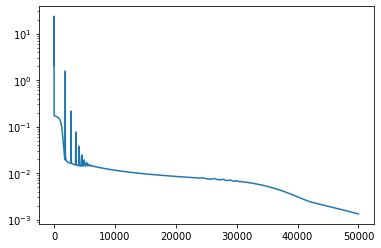

In [34]:
plt.plot(L)
plt.yscale('log')

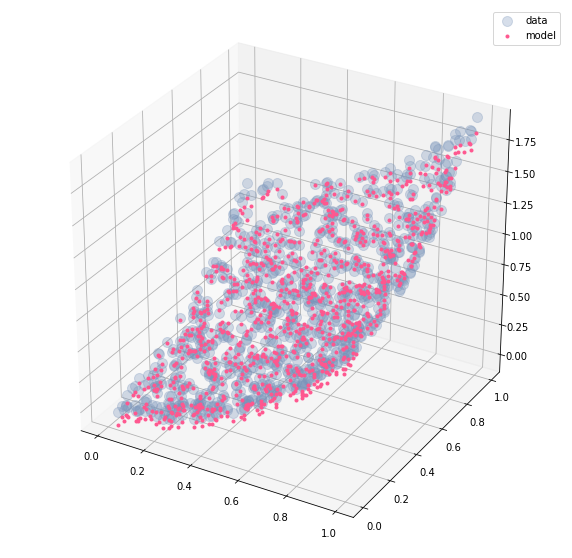

In [35]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

y_pred = g.fwd_prop(X)


ax.plot(X[:,0], X[:,1], Y, '.', c='#7994ba', markersize=20, alpha=0.3)
ax.plot(X[:,0], X[:,1], y_pred, '.', c='#ff578f')
plt.legend(['data', 'model'])
plt.show()